In [3]:
2+1

3

In [4]:
import pandas as pd

In [9]:
iris = pd.read_csv('C:\\Users\\User\\Desktop\\Systemy Sztucznej Inteligencji\\8.03.2022\\iris.csv')

In [10]:
iris.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [11]:
iris.tail(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
130,7.4,2.8,6.1,1.9,Virginica
131,7.9,3.8,6.4,2.0,Virginica
132,6.4,2.8,5.6,2.2,Virginica
133,6.3,2.8,5.1,1.5,Virginica
134,6.1,2.6,5.6,1.4,Virginica
135,7.7,3.0,6.1,2.3,Virginica
136,6.3,3.4,5.6,2.4,Virginica
137,6.4,3.1,5.5,1.8,Virginica
138,6.0,3.0,4.8,1.8,Virginica
139,6.9,3.1,5.4,2.1,Virginica


In [12]:
iris.loc[5]

sepal.length       5.4
sepal.width        3.9
petal.length       1.7
petal.width        0.4
variety         Setosa
Name: 5, dtype: object

In [13]:
iris.at[1,'sepal.length']

4.9

In [14]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [15]:
iris.iat[1,0]

4.9

In [20]:
iris.columns.tolist()[-1]

'variety'

In [21]:
len(iris)

150

In [22]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
import seaborn as sns
sns.set_palette('Reds')

In [28]:
sns.set_palette('husl')

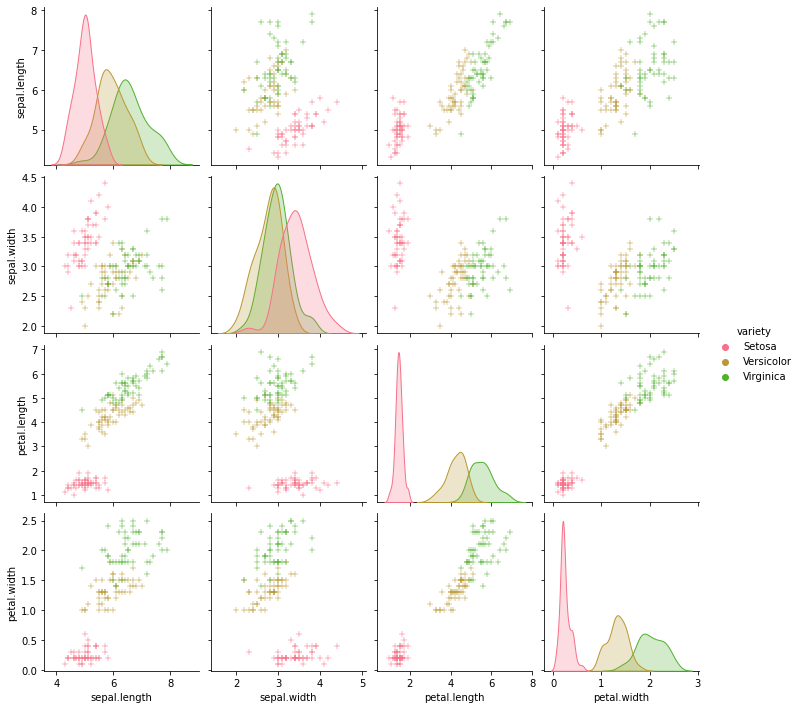

In [29]:
sns.pairplot(iris,
             hue = 'variety',
             markers = '+')

<AxesSubplot:xlabel='sepal.length', ylabel='variety'>

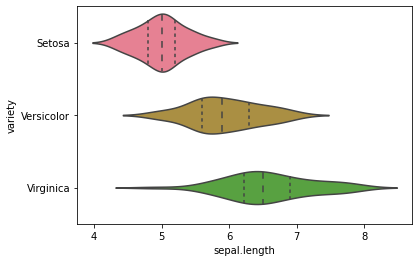

In [32]:
sns.violinplot(y='variety', x='sepal.length', data=iris, inner='quartile')

In [41]:
import random 
class DataProcessing:
    @staticmethod
    def potasuj(Dane): #Potasować dane zaczynając od końca
        for i in range(len(Dane) - 1, 0 , -1):
            j = random.randint(0, i)
            Dane.iloc[i], Dane.iloc[j] = Dane.iloc[j], Dane.iloc[i]
        return Dane
    
    @staticmethod
    def splitSet(Dane): #Podzielić DataFrame na testowy i treningowy 30/70
        split = int(len(Dane)*0.7)
        daneTrening = Dane.iloc[:split, :]
        daneTest = Dane.iloc[split:, :]
        return daneTrening, daneTest
    
    @staticmethod
    def normalizacja(Dane): #Znormalizować dane: Dane = (Dane - min) / (max - min)
        Dane_ = Dane.copy()
        wartosci = Dane_.select_dtypes(exclude="object")
        kolumny = wartosci.columns.tolist()
        for kolumna in kolumny:
            dane = Dane_.loc[:, kolumna]
            maks = max(dane)
            minimum = min(dane)
            for rzad in range(0, len(Dane_), 1):
                wartosc = (Dane_.at[rzad, kolumna] - minimum) / (maks - minimum)
                Dane_.at[rzad, kolumna] = wartosc
        return Dane_
    
irisPotasuj = DataProcessing.potasuj(iris)
irisPodziel = DataProcessing.splitSet(iris)
irisNormalizuj = DataProcessing.normalizacja(iris)

In [46]:
print(irisPotasuj)

     sepal.length  sepal.width  petal.length  petal.width     variety
0             6.2          2.2           4.5          1.5  Versicolor
1             6.5          3.0           5.2          2.0   Virginica
2             5.2          3.4           1.4          0.2      Setosa
3             5.0          2.0           3.5          1.0  Versicolor
4             6.8          3.0           5.5          2.1   Virginica
..            ...          ...           ...          ...         ...
145           5.0          3.6           1.4          0.2      Setosa
146           5.4          3.7           1.5          0.2      Setosa
147           5.1          3.7           1.5          0.4      Setosa
148           7.6          3.0           6.6          2.1   Virginica
149           5.1          3.5           1.4          0.2      Setosa

[150 rows x 5 columns]


In [43]:
print(irisPodziel)

(     sepal.length  sepal.width  petal.length  petal.width     variety
0             6.2          2.2           4.5          1.5  Versicolor
1             6.5          3.0           5.2          2.0   Virginica
2             5.2          3.4           1.4          0.2      Setosa
3             5.0          2.0           3.5          1.0  Versicolor
4             6.8          3.0           5.5          2.1   Virginica
..            ...          ...           ...          ...         ...
100           6.1          2.8           4.7          1.2  Versicolor
101           6.7          3.0           5.0          1.7  Versicolor
102           4.8          3.4           1.6          0.2      Setosa
103           7.2          3.0           5.8          1.6   Virginica
104           5.4          3.9           1.3          0.4      Setosa

[105 rows x 5 columns],      sepal.length  sepal.width  petal.length  petal.width     variety
105           4.6          3.2           1.4          0.2      S

In [48]:
print(irisNormalizuj)

     sepal.length  sepal.width  petal.length  petal.width     variety
0        0.527778     0.083333      0.593220     0.583333  Versicolor
1        0.611111     0.416667      0.711864     0.791667   Virginica
2        0.250000     0.583333      0.067797     0.041667      Setosa
3        0.194444     0.000000      0.423729     0.375000  Versicolor
4        0.694444     0.416667      0.762712     0.833333   Virginica
..            ...          ...           ...          ...         ...
145      0.194444     0.666667      0.067797     0.041667      Setosa
146      0.305556     0.708333      0.084746     0.041667      Setosa
147      0.222222     0.708333      0.084746     0.125000      Setosa
148      0.916667     0.416667      0.949153     0.833333   Virginica
149      0.222222     0.625000      0.067797     0.041667      Setosa

[150 rows x 5 columns]
